In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
img = cv2.imread('cat.png',0)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
# row, col = img.shape
# center_row, center_col = row // 2, col // 2
 
# # create a mask with a centered square of 1s
# mask = np.zeros((row, col, 2), np.uint8)
# mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1
# fft_shift = fourier_shift * mask
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2  # Center of the image

# Create a Gaussian mask
sigma = 20  # Standard deviation for Gaussian kernel
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Create a 2-channel Gaussian mask for the DFT result (real + imaginary)
mask = np.zeros((rows, cols, 2), np.float32)
mask[:, :, 0] = gaussian  # Apply the mask to the real part
mask[:, :, 1] = gaussian  # Apply the mask to the imaginary part

# Step 4: Apply the Gaussian mask to the DFT shifted result
filtered_dft = fourier_shift * mask
fft_ifft_shift = np.fft.ifftshift(filtered_dft)
imageThen = cv2.idft(fft_ifft_shift)
# calculate the magnitude of the Fourier Transform
# magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])
# Scale the magnitude for display
# magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

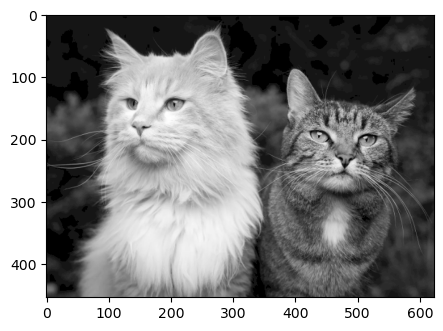

In [19]:
fft_ifft_shift_1 = np.fft.ifftshift(fourier_shift)
imageThen_1 = cv2.idft(fft_ifft_shift_1)
# calculate the magnitude of the Fourier Transform
# magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
imageThen_1 = cv2.magnitude(imageThen_1[:,:,0], imageThen_1[:,:,1])
plt.figure(figsize=(5,5))
plt.imshow(imageThen_1, cmap='gray')
plt.show()

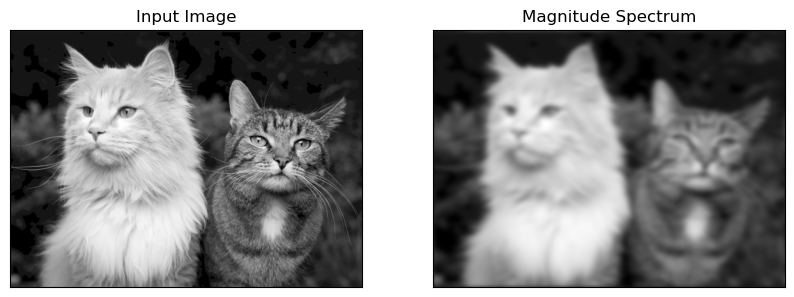

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(-0.5, 622.5, 453.5, -0.5)

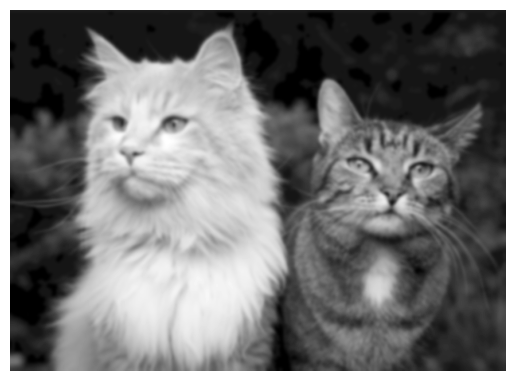

In [24]:
fimage = cv2.GaussianBlur(img, (9,9), 0) #image, kernel size, sigma
plt.imshow(fimage,cmap='gray'); plt.axis("off")

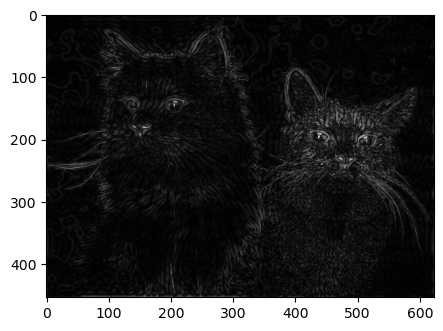

In [25]:
mask = np.ones((rows, cols, 2), np.float32)
r = 30  # Radius for low frequencies
mask[crow-r:crow+r, ccol-r:ccol+r] = 0
high_filtered_dft = fourier_shift * mask
fft_ifft_shift = np.fft.ifftshift(high_filtered_dft)
imageThen_high = cv2.idft(fft_ifft_shift)
# calculate the magnitude of the Fourier Transform
# magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
imageThen_high = cv2.magnitude(imageThen_high[:,:,0], imageThen_high[:,:,1])
plt.figure(figsize=(5,5))
plt.imshow(imageThen_high, cmap='gray')
plt.show()